In [1]:
# Importing the necessary tools for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import io
%cd "C:\PGA 23\Capstone project"

C:\PGA 23\Capstone project


In [3]:
# loading the file
travelinsurance=pd.read_csv("TravelInsurancePrediction.csv")

In [4]:
# We can observe the dataset by checking a few of the rows using the head() method.
travelinsurance.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
# shape method shows number of observations and variables
travelinsurance.shape

(1987, 10)

In [6]:
# info() method shows some of the characteristics of the data such as Column Name, No. of
#Dtype of the data, and Memory Usage.
travelinsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [7]:
#We need to delete "Unnamed:0 column" because it's showing indexes what we don't need
travelinsurance=travelinsurance.drop("Unnamed: 0",axis=1)

In [8]:
#Checking if ChronicDiseases has 1 and 0 only(binary)
travelinsurance.ChronicDiseases.value_counts()

0    1435
1     552
Name: ChronicDiseases, dtype: int64

Observations:
* Chronic Diseases having only binary data so we are assuming that '1' means that the travellers has a chronic Disease and '0' means the traveller is free of any chronic disease.

In [9]:
#function for coverting binary to yes/no
def convert_binary_to_yesno(x):
    if x == 1:
        return "Yes"
    else:
        return "No"

In [10]:
#function for coverting yes/no to binary
def convert_yesno_to_binary(x):
    if x == "Yes":
        return 1
    else:
        return 0

In [11]:
#Converting ChronicDiseases to a Yes/No field for keeping it consistent with other Yes/No fields for our analysis  
travelinsurance['ChronicDiseases']=travelinsurance['ChronicDiseases'].apply(convert_binary_to_yesno)

In [12]:
travelinsurance.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,Yes,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,Yes,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,Yes,Yes,No,0


In [13]:
# Temporarily converting our dependent variable to a Yes/No field to get a clear categorical & numerical column list
travelinsurance['TravelInsurance']=travelinsurance['TravelInsurance'].apply(convert_binary_to_yesno)

In [14]:
numcols=travelinsurance.select_dtypes(include=np.number)
objcols=travelinsurance.select_dtypes(include=['object'])

In [15]:
numcols.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers'], dtype='object')

In [16]:
objcols.columns

Index(['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [17]:
#Checking missing values in our data
travelinsurance.isnull().sum().sort_values(ascending=False)

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Observations:
* There are no missing values in the dataset.

Let us check the each varibles distribution
* 1.Age

In [18]:
travelinsurance.Age.describe()

count    1987.000000
mean       29.650226
std         2.913308
min        25.000000
25%        28.000000
50%        29.000000
75%        32.000000
max        35.000000
Name: Age, dtype: float64

<AxesSubplot: >

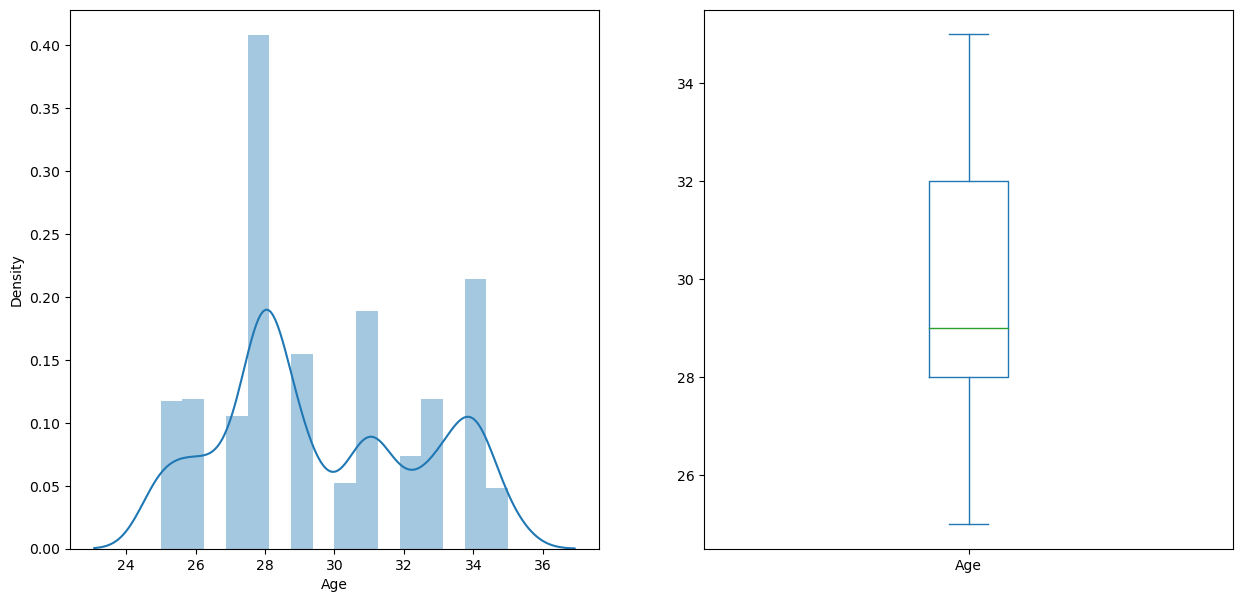

In [19]:
plt.figure(2)
plt.subplot(121)
sns.distplot(travelinsurance['Age'])
plt.subplot(122)
travelinsurance["Age"].plot.box(figsize=(15,7))

Observations-

* The mean and median are almost similar
* The density of people with age 28 is the highest
* The age range lies between 25 - 35 years

2.AnnualIncome

In [20]:
travelinsurance.AnnualIncome.describe()

count    1.987000e+03
mean     9.327630e+05
std      3.768557e+05
min      3.000000e+05
25%      6.000000e+05
50%      9.000000e+05
75%      1.250000e+06
max      1.800000e+06
Name: AnnualIncome, dtype: float64

<AxesSubplot: >

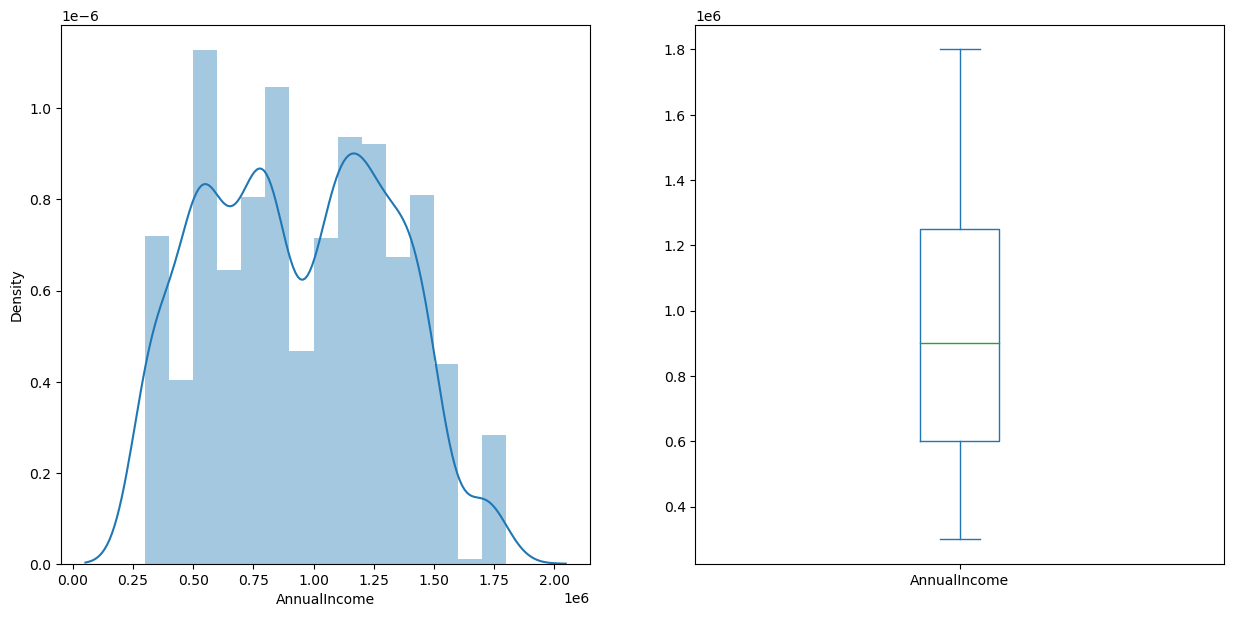

In [21]:
plt.figure(2)
plt.subplot(121)
sns.distplot(travelinsurance['AnnualIncome'])
plt.subplot(122)
travelinsurance['AnnualIncome'].plot.box(figsize=(15,7))

Observations:

* As per the graph the income distribution follows modified normal distribution
* There is a significant drop in the number of people from an income greater than 1.6M to 1.8M
* Here also the mean and median are almost the same

3.FamilyMembers

In [22]:
travelinsurance.FamilyMembers.describe()

count    1987.000000
mean        4.752894
std         1.609650
min         2.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: FamilyMembers, dtype: float64

<AxesSubplot: >

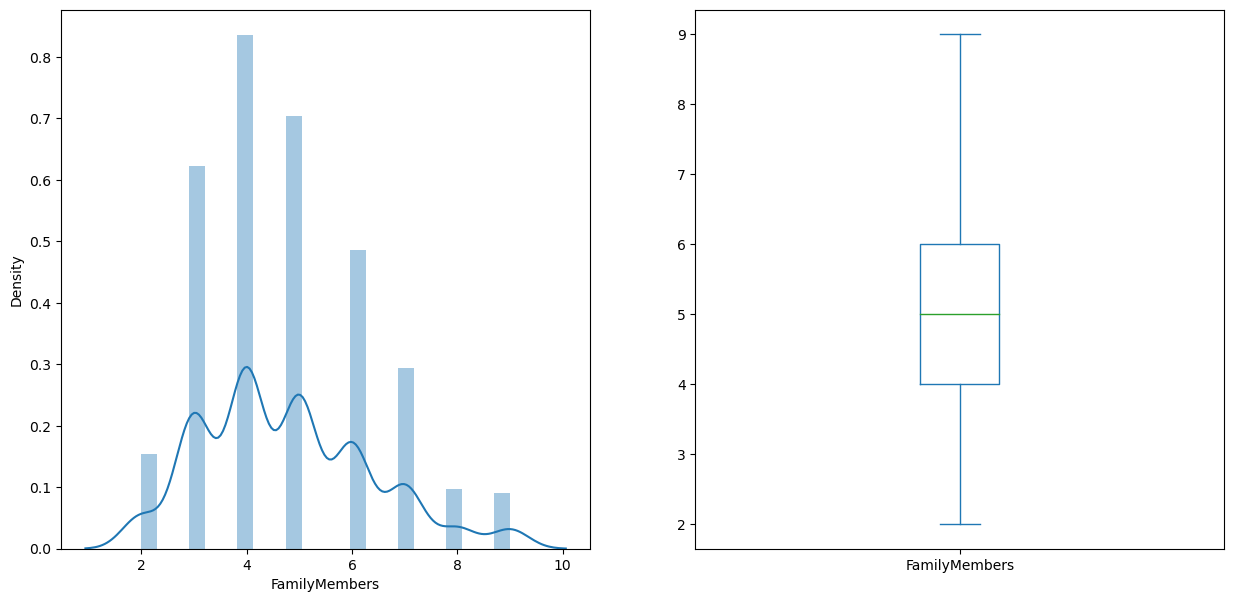

In [23]:
plt.figure(2)
plt.subplot(121)
sns.distplot(travelinsurance['FamilyMembers'])
plt.subplot(122)
travelinsurance['FamilyMembers'].plot.box(figsize=(15,7))

Observations:

* Average number of family members for the ones travelling is around 4
* We have atleast 2 family members for any traveller

4.Employment Type

In [24]:
travelinsurance['Employment Type'].value_counts()

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

Text(0.5, 0, 'No of persons')

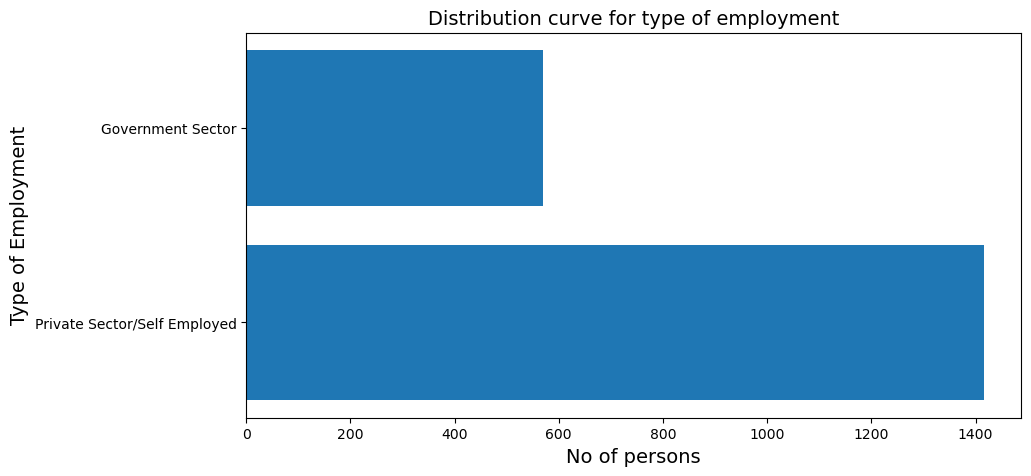

In [25]:
plt.figure(figsize=(10,5))
plt.barh(['Private Sector/Self Employed','Government Sector'],travelinsurance['Employment Type'].value_counts())
plt.title('Distribution curve for type of employment', size=14)
plt.ylabel("Type of Employment", size=14)
plt.xlabel("No of persons", size=14)

Observations:

* There are only two categories of employment type of travellers in our dataset - Private Sector and Government Sector
* No of private sector travellers are almost double of Government sector travellers

5. GraduateOrNot

Yes    1692
No      295
Name: GraduateOrNot, dtype: int64


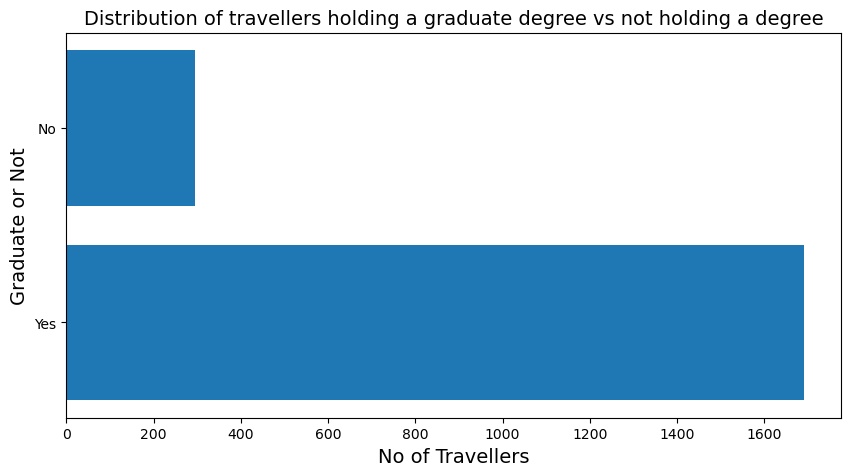

In [26]:
plt.figure(figsize=(10,5))
plt.barh(['Yes','No'],travelinsurance['GraduateOrNot'].value_counts())
plt.title('Distribution of travellers holding a graduate degree vs not holding a degree', size=14)
plt.ylabel("Graduate or Not", size=14)
plt.xlabel("No of Travellers", size=14)
print(travelinsurance['GraduateOrNot'].value_counts())

Observations:

* 85% of the travellers in our dataset hold a graduate degree

6. FrequentFlyer

No     1570
Yes     417
Name: FrequentFlyer, dtype: int64

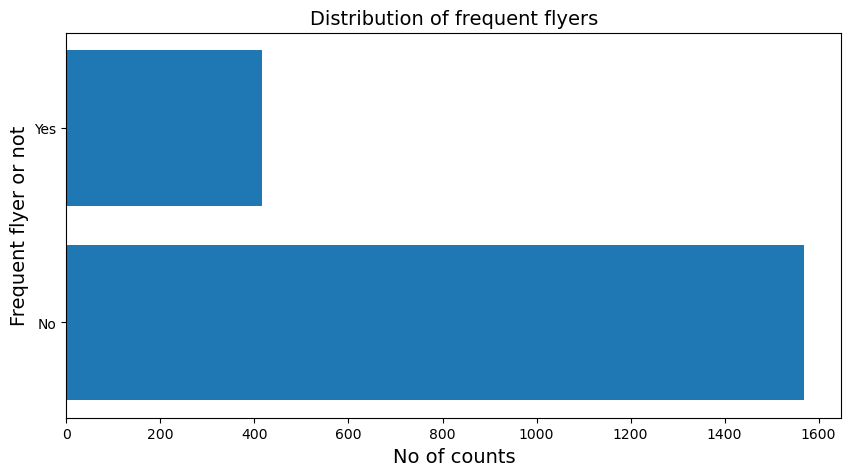

In [27]:
plt.figure(figsize=(10,5))
plt.barh(['No','Yes'],travelinsurance['FrequentFlyer'].value_counts())
plt.title('Distribution of frequent flyers', size=14)
plt.ylabel("Frequent flyer or not", size=14)
plt.xlabel("No of counts", size=14)
travelinsurance['FrequentFlyer'].value_counts()

Observations:

* More than 60% of the travellers do not travel than often so we will have to check if they would even consider opting for a travel insurance

7. ChronicDiseases

Text(0, 0.5, 'Chronic Disease')

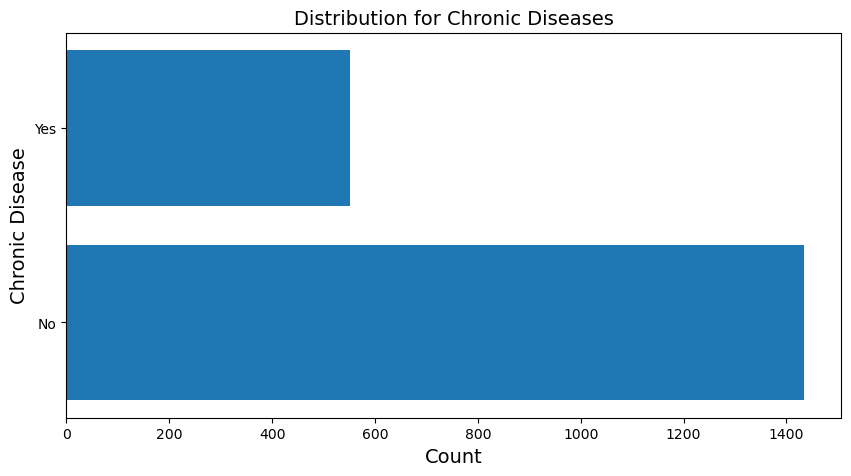

In [28]:
plt.figure(figsize=(10,5))
plt.barh(['No','Yes'],travelinsurance['ChronicDiseases'].value_counts())
plt.title('Distribution for Chronic Diseases', size =14)
plt.xlabel("Count", size =14)
plt.ylabel("Chronic Disease", size =14)

Observations:

* Majority of the travellers do not have any chronic disease

8. EverTravelledAbroad

No     1607
Yes     380
Name: EverTravelledAbroad, dtype: int64


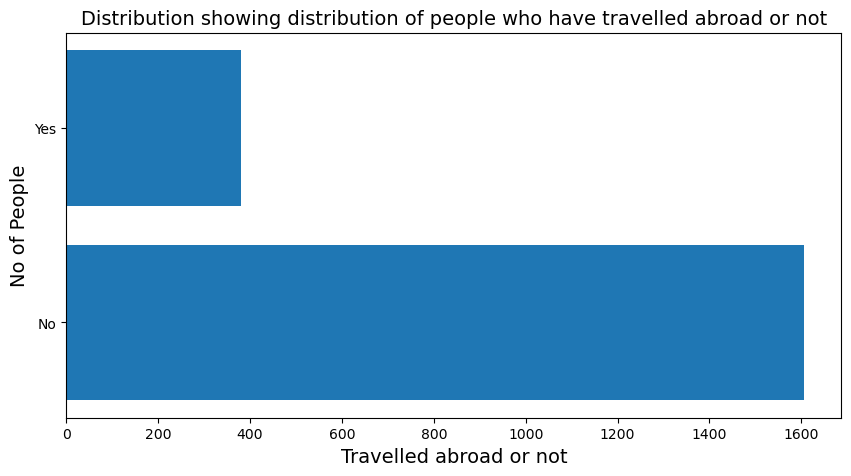

In [29]:
plt.figure(figsize=(10,5))
plt.barh(['No','Yes'],travelinsurance['EverTravelledAbroad'].value_counts())
plt.title('Distribution showing distribution of people who have travelled abroad or not', size =14)
plt.xlabel("Travelled abroad or not", size =14)
plt.ylabel("No of People", size =14)
print(travelinsurance['EverTravelledAbroad'].value_counts())

Observations:

* Only 20% of the travellers have a travel history travelling abroad

Before we move further, we need to do some data cleaning for our analysis and also for building the model.

We will covert 'Yes/No' to 1/0 - GraduateOrNot, FrequentFlyer, EverTravelledAbroad, ChronicDiseases,TravelInsurance

For employment type we will follow the rule: Governemnt Sector -> 1, Private Sector -> 0

In [30]:
# Splitting our dataset- 1. Independant varibles 2. Dependant Variable
y = travelinsurance['TravelInsurance']
x = travelinsurance.drop('TravelInsurance',axis = 1)

In [31]:
# Coverting our independent categorical variables from Yes/No to Binary
x['GraduateOrNot'] = x['GraduateOrNot'].apply(convert_yesno_to_binary)
x['FrequentFlyer'] = x['FrequentFlyer'].apply(convert_yesno_to_binary)
x['EverTravelledAbroad'] = x['EverTravelledAbroad'].apply(convert_yesno_to_binary)
x['ChronicDiseases'] = x['ChronicDiseases'].apply(convert_yesno_to_binary)

# Converting the target variable from Yes/No to Binary
y = y.apply(convert_yesno_to_binary)

In [32]:
#function for converting Employement type to binary
def convert_employmenttype_to_binary(employmenttype):
    if employmenttype == "Government Sector":
        return 1
    else:
        return 0

In [33]:
# Converting EmployementType to Binary
x['Employment Type'] = x['Employment Type'].apply(convert_employmenttype_to_binary)

In [34]:
x.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,1,1,400000,6,1,0,0
1,31,0,1,1250000,7,0,0,0
2,34,0,1,500000,4,1,0,0
3,28,0,1,700000,3,1,0,0
4,28,0,1,700000,8,1,1,0


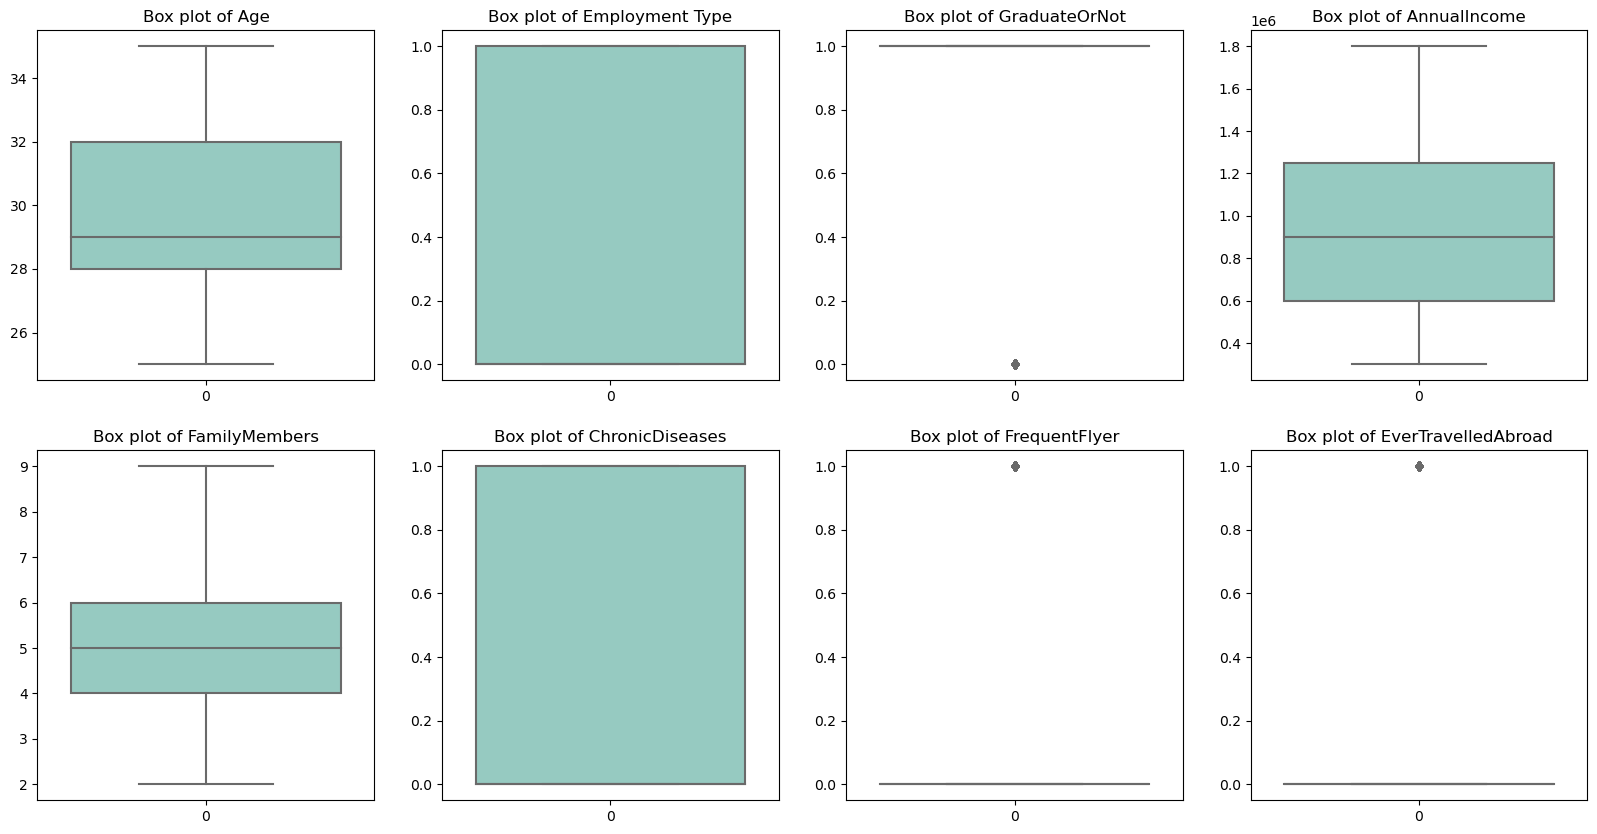

In [35]:
#Checking the Ranges of the predictor variables individually
cols = list(x.columns)
axs = plt.subplots(2,4,figsize=(20,10))
for i in range(len(cols)):
  plt.subplot(2,4,i+1)
  plt.title('Box plot of '+ cols[i])
  sns.boxplot(x[cols[i]], palette = 'Set3')
plt.show()

Observations:

* Majority of the travellers have an age greater than the median age of ~29 years
* No of family above and below the median is almost same
* The income group appears to be normally distributed as the 25-50 percentile and 50-75% have almost similar area
* Number of travellers without a Graduate degree is low
* Number of travellers who are frequent flyers or have travelled abroad is also low
* There are no outliers in our dataset

In [36]:
# Normalizing
# list of numerical columns which require normalization
num_cols=['AnnualIncome','Age', 'FamilyMembers']

# Importing required library from sklearn for normalization
from sklearn import preprocessing
feature_to_scale = num_cols

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x[feature_to_scale] = min_max_scaler.fit_transform(x[feature_to_scale])

In [37]:
# Checking our predictor variables after normalization
x.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,0.465023,0.286865,0.851535,0.421842,0.393271,0.277806,0.209864,0.191243
std,0.291331,0.452412,0.355650,0.251237,0.229950,0.448030,0.407314,0.393379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,0.000000,1.000000,0.200000,0.285714,0.000000,0.000000,0.000000
50%,0.400000,0.000000,1.000000,0.400000,0.428571,0.000000,0.000000,0.000000
75%,0.700000,1.000000,1.000000,0.633333,0.571429,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations:

* We can see that the numerical variables - age, annual income and family members are now in the range of 0 to 1

Text(0.5, 1.0, 'Box plot of predictor variables of the dataset')

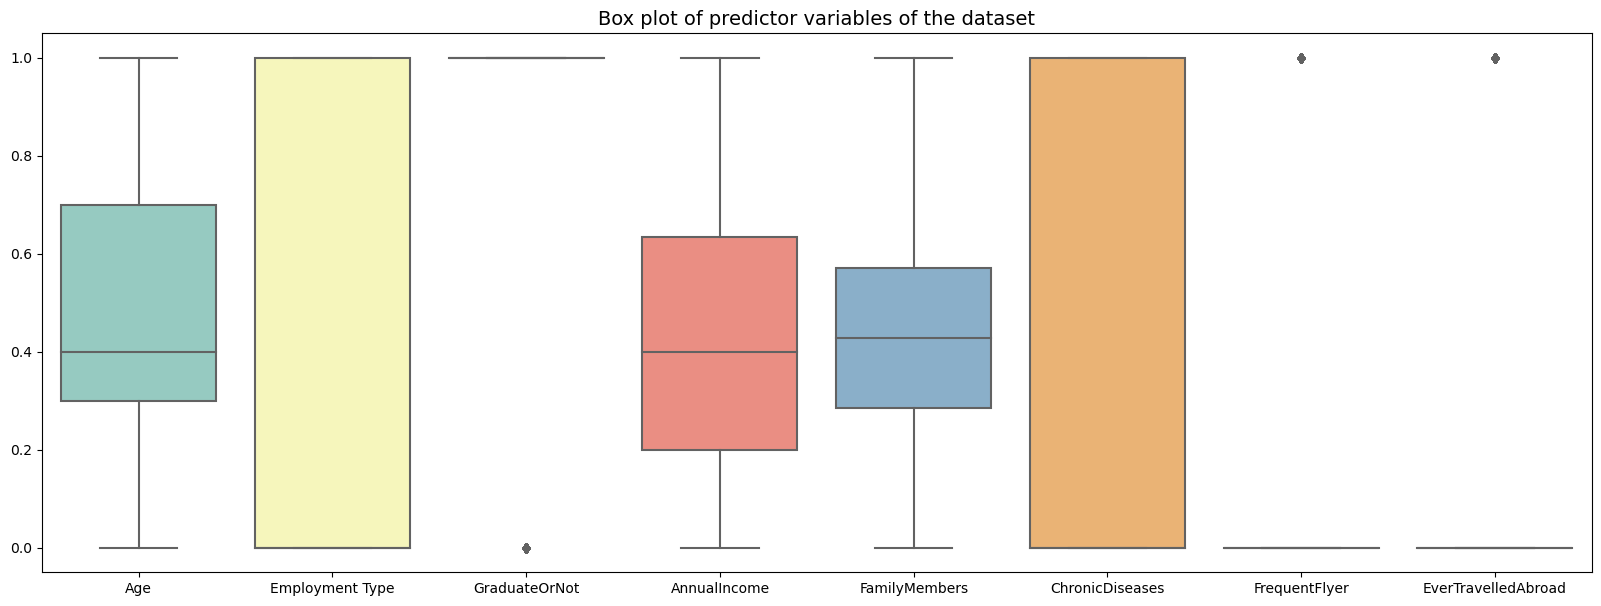

In [38]:
#Checking the Ranges of the predictor variables together after normalization of numerical variables
plt.figure(figsize=(20,7))
sns.boxplot(data=x, palette="Set3")
plt.title("Box plot of predictor variables of the dataset", size=14)

In [39]:
# Lets check the correlation among the predictor variables using a correlation matrix
x.corr()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
Age,1.000000,0.115134,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779
Employment Type,0.115134,1.000000,0.127133,-0.349157,0.003354,0.011553,-0.143790,-0.181098
GraduateOrNot,0.027125,0.127133,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683
AnnualIncome,-0.020101,-0.349157,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043
FamilyMembers,0.027409,0.003354,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755
ChronicDiseases,0.007359,0.011553,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238
FrequentFlyer,-0.033159,-0.143790,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334
EverTravelledAbroad,-0.012779,-0.181098,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000


<AxesSubplot: >

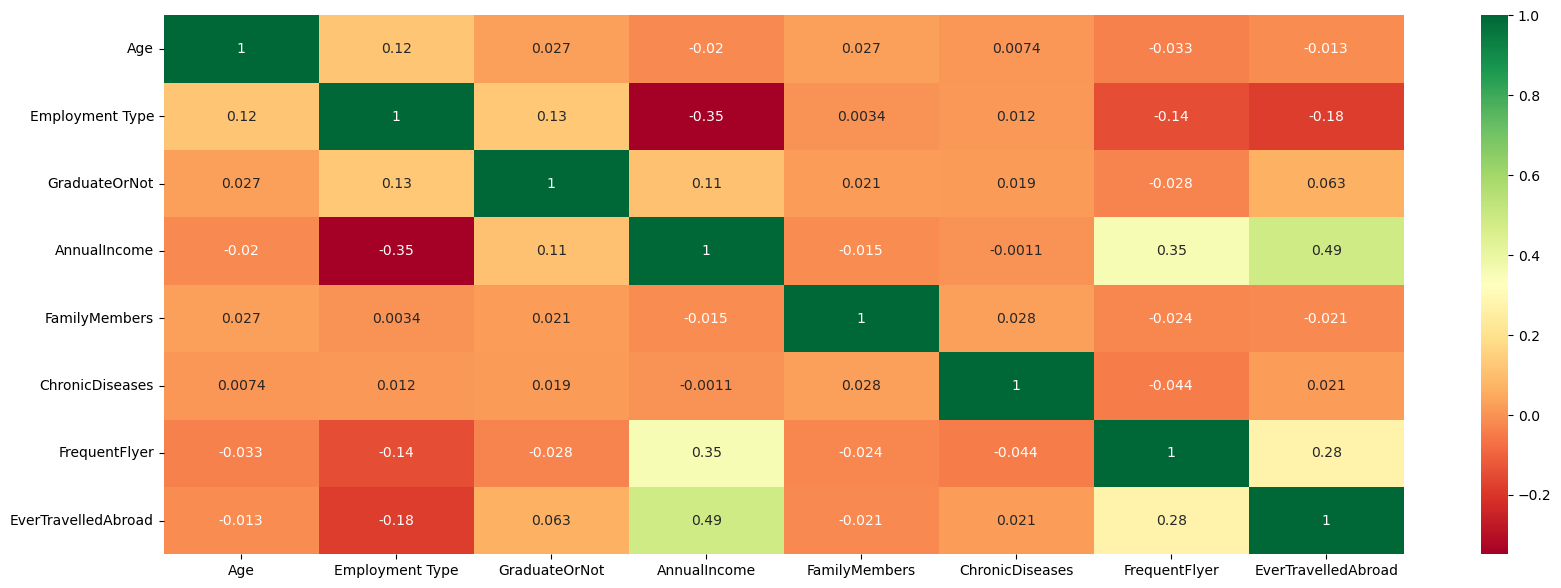

In [40]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(x.corr(), annot=True, cmap='RdYlGn')

Observations:

* It is very clear from the heatmap that most of the variables are not dependent on each other
* Degree of collinearity is significantly less that 0.1 for most variables
* The Annual income and the international travel history of the travellers have a degree of collinearity of 0.49 which still is   not a significant dependecy of variables on each other

In [42]:
y.value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

<AxesSubplot: >

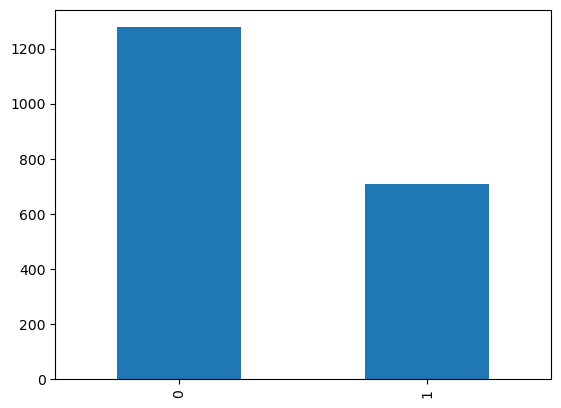

In [43]:
y.value_counts().plot(kind="bar") # imbalance data

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
smote = SMOTE(random_state=42)

In [46]:
x_smote,y_smote = smote.fit_resample(x,y)

In [47]:
print(pd.DataFrame(y_smote).value_counts())

TravelInsurance
0                  1277
1                  1277
dtype: int64


# Creating a Train - Test split for our model training and predictions

In [48]:
from sklearn.model_selection import  train_test_split

#Spliting data into Training 80% and Test set 20%

X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=1)

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logreg=LogisticRegression()

In [51]:
logregmodel=logreg.fit(X_train,y_train)

In [52]:
y_pred=logreg.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve

In [54]:
accuracy_score(y_test,y_pred)

0.7240704500978473

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       260
           1       0.75      0.66      0.70       251

    accuracy                           0.72       511
   macro avg       0.73      0.72      0.72       511
weighted avg       0.73      0.72      0.72       511



In [66]:
pd.crosstab(y_test,y_pred)

col_0,0,1
TravelInsurance,,
0,204,56
1,85,166


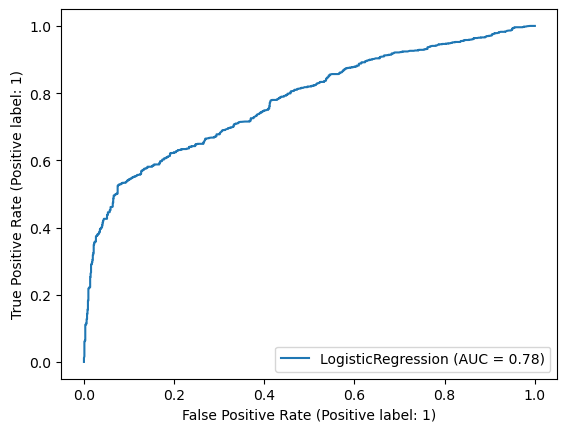

In [67]:
plot_roc_curve(logregmodel,X_train,y_train)

In [68]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [69]:
tree=DecisionTreeClassifier()

In [70]:
treemodel=tree.fit(X_train,y_train)

In [90]:
y_pred=treemodel.predict(X_test)

In [91]:
accuracy_score(y_test,tree_pred)

0.8023483365949119

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       260
           1       0.82      0.76      0.79       251

    accuracy                           0.80       511
   macro avg       0.80      0.80      0.80       511
weighted avg       0.80      0.80      0.80       511



In [93]:
pd.crosstab(y_test,y_pred)

col_0,0,1
TravelInsurance,,
0,219,41
1,60,191


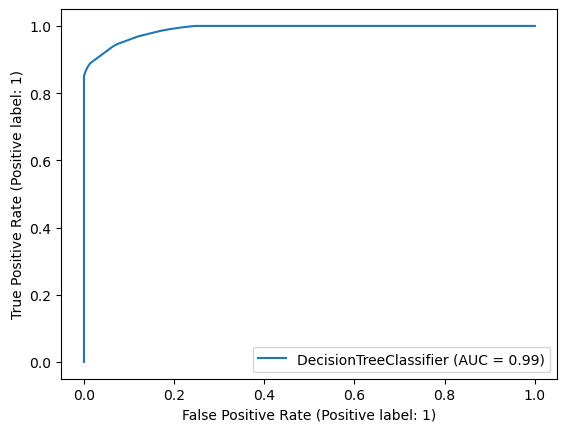

In [94]:
plot_roc_curve(treemodel,X_train,y_train)

In [76]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

In [77]:
RF=RandomForestClassifier(n_estimators=1000)

In [78]:
RFmodel=RF.fit(X_train,y_train)

In [79]:
y_pred=RFmodel.predict(X_test)

In [80]:
accuracy_score(y_test,y_pred)

0.8199608610567515

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       260
           1       0.85      0.77      0.81       251

    accuracy                           0.82       511
   macro avg       0.82      0.82      0.82       511
weighted avg       0.82      0.82      0.82       511



In [98]:
pd.crosstab(y_test,y_pred)

col_0,0,1
TravelInsurance,,
0,219,41
1,60,191


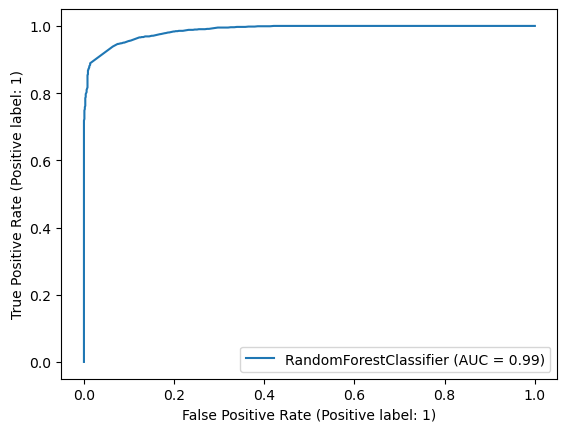

In [108]:
plot_roc_curve(RFmodel,X_train,y_train)

In [99]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
gbm=GradientBoostingClassifier(n_estimators=3000)

In [101]:
gbmmodel=gbm.fit(X_train,y_train)

In [102]:
y_pred=gbmmodel.predict(X_test)

In [103]:
accuracy_score(y_test,y_pred)

0.8551859099804305

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       260
           1       0.88      0.82      0.85       251

    accuracy                           0.86       511
   macro avg       0.86      0.85      0.85       511
weighted avg       0.86      0.86      0.85       511



In [105]:
pd.crosstab(y_test,y_pred)

col_0,0,1
TravelInsurance,,
0,232,28
1,46,205


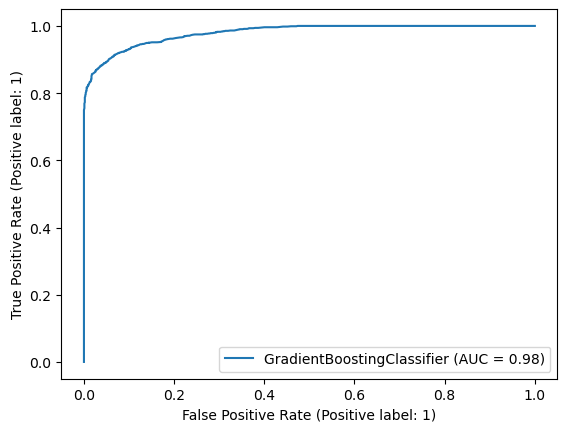

In [107]:
plot_roc_curve(gbmmodel,X_train,y_train)